<a href="https://colab.research.google.com/github/tevfikcagridural/student-success/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal For Exploratory Data Analysis
In this section, prepared data will be explored to get insights about each attempt's behavioural pattern, scores, interaction with the virtual learning environment, other information like age, gender and so.

Examined questions are:
- Is the mean score only determiner for the final result?
- What is specific scores relation with the final result?
- Do the location, imd_band and highest education affect the final result?
- What is the behaviour of interactions with VLE and it's the effect on the final result?
- What are the effects of submission dates to the final result?

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# General Settings

Genereal plotting settings or functions to be used during the process.  

In [2]:
sns.set_theme(style="ticks")
plt.style.use('ggplot')

In [3]:
def create_ax_index(nrows,ncols):
  """ 
  *** must be same with first two parameters of plt.subplots***

  Creates an index to be used grid plotting while iterating through 
  the columns of the DataFrame I'll also need to itarate through a list 
  to specifity which column will be plotted on which part of the grid.
  This function creates an index list to be itared together with the DataFrame
  nrows: number of the rows of the grid, 
  ncols number of the columns of the grid,
  """
  
  assert type(nrows) == int, "nrows must be integer"
  assert type(ncols) == int, "ncols must be integer"
  
  size = nrows * ncols
  t = np.zeros((size,2), int)
  slicer = [x for x in range(0,size+1,ncols)] 
  for i in range(0,nrows):
    t[slicer[i]:slicer[i+1], 1] = [x for x in range(ncols)]
    t[slicer[i]:slicer[i+1], 0] = i
    
  return t.tolist()

# Load the Data

Cleaned and ready-for-analysis data was prepared in data wrangling part and saved as `attempts.csv`.


In [4]:
attempts = pd.read_csv("https://raw.githubusercontent.com/tevfikcagridural/student-success/master/data/interim/attempts.csv", index_col=0)

In [5]:
attempts.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,0,Pass,268,-159.0,NaN,82.4,78.0,82.0,82.0,3.082207,78.0,85.0,9.0,0.83666,0.0,0.0,5.0,32.0,193.0,138.0,553.0,0.0,0.0,13.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,0,Pass,268,-53.0,NaN,65.4,70.0,66.4,60.0,4.335897,60.0,70.0,0.0,3.24037,0.0,0.0,5.0,87.0,417.0,324.0,537.0,0.0,0.0,12.0,48.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,1,Withdrawn,268,-92.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,126.0,59.0,66.0,0.0,0.0,4.0,4.0


In [6]:
attempts.shape

(32593, 35)

# Explore the Data

There are 35 columns in the data. Some are continuous, some categorical

In [7]:
attempts.describe().T

,count,mean,std,min,25%,50%,75%,max
id_student,32593.0,706687.669131,549167.313855,3733.0,508573.000000,590310.000000,644453.000000,2.716795e+06
num_of_prev_attempts,32593.0,0.163225,0.479758,0.0,0.000000,0.000000,0.000000,6.000000e+00
studied_credits,32593.0,79.758691,41.071900,30.0,60.000000,60.000000,120.000000,6.550000e+02
disability,32593.0,0.097076,0.296066,0.0,0.000000,0.000000,0.000000,1.000000e+00
module_presentation_length,32593.0,256.010125,13.179078,234.0,241.000000,262.000000,268.000000,2.690000e+02
date_registration,32548.0,-69.411300,49.260522,-322.0,-100.000000,-57.000000,-29.000000,1.670000e+02
date_unregistration,10072.0,49.757645,82.460890,-365.0,-2.000000,27.000000,109.000000,4.440000e+02
avg_score,25843.0,63.238990,25.676777,0.0,54.333333,70.000000,81.040000,1.000000e+02
first_score,25820.0,73.322851,20.949596,0.0,65.000000,77.000000,88.000000,1.000000e+02
mean_score,25820.0,72.768254,16.374997,0.0,64.666667,76.000000,84.545455,1.000000e+02


Obvisusly there is something wrong with `submit_day_delta` with a minimum value of `-1870`.

In [8]:
attempts[attempts.submit_day_delta == -1870]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
24162,FFF,2013J,325750,M,Scotland,HE Qualification,10-20,35-55,1,90,0,Withdrawn,268,-32.0,235.0,64.5,68.0,67.5,68.0,17.939714,24.0,95.0,-1870.0,195.029912,0.0,0.0,10.0,179.0,130.0,130.0,1036.0,25.0,2.0,26.0,12.0


So this is just one student. When I get back to data wrangling and check the student's each assginment some of them were more than 300 days. So there was no miscalculation.

In [9]:
# Continuous features
continious_features = ['num_of_prev_attempts', 'studied_credits','module_presentation_length',
                    'date_registration', 'date_unregistration', 'avg_score',
                     'first_score', 'mean_score', 'last_score', 'score_std',
                    'min_weight_score', 'max_weight_score', 'submit_day_delta',
                    'submit_day_delta_std', 'num_banked', 'num_of_assmnt',
                    'subpage_clicks', 'forumng_clicks', 'homepage_clicks',
                    'oucontent_clicks', 'ouwiki_clicks', 'quiz_clicks',
                    'resource_clicks', 'url_clicks']
# Categorical features
categorical_features = ['code_module', 'code_presentation', 'disability', 'has_exam', 
                   'gender', 'region', 'highest_education', 'imd_band', 'age_band']

## Reviewing anomalies

Let's have a look if there is an anomaly at the continius features.

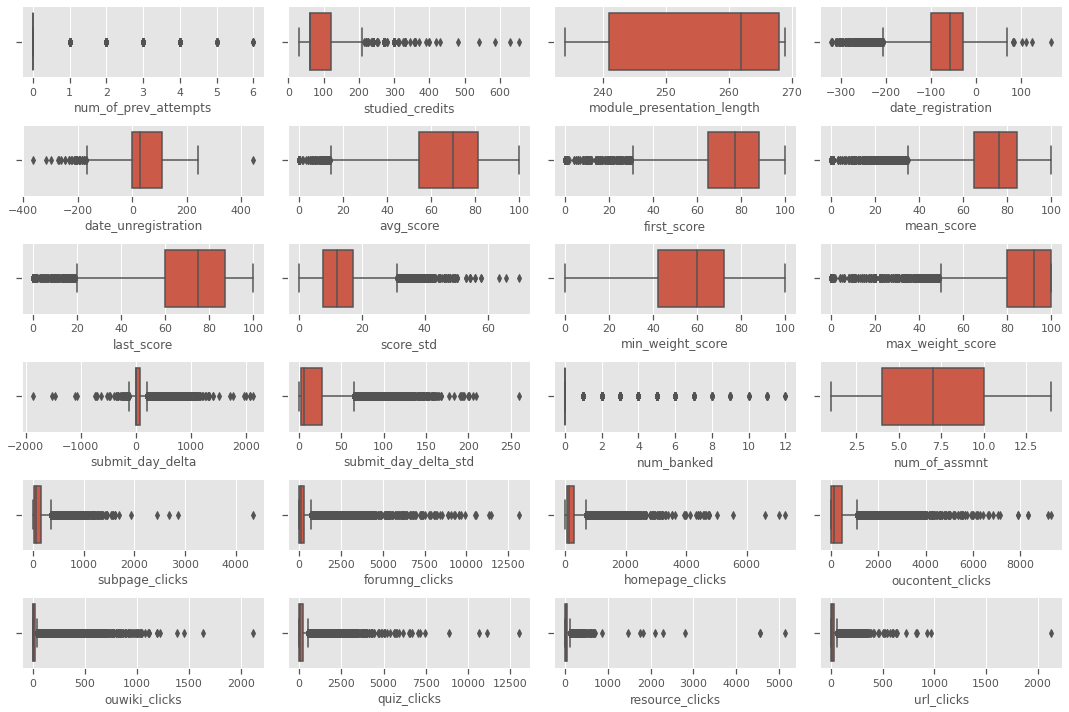

In [10]:
# Set subplot settings 
fig, ax = plt.subplots(6,4, figsize=(15,10))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(6,4), continious_features):
  _ = sns.boxplot(x=col, data=attempts, ax=ax[j[0],j[1]])

plt.tight_layout()

In [11]:
attempts['num_of_prev_attempts'].value_counts()

0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

Nothing specific.

## Continuous fetaure's distributions

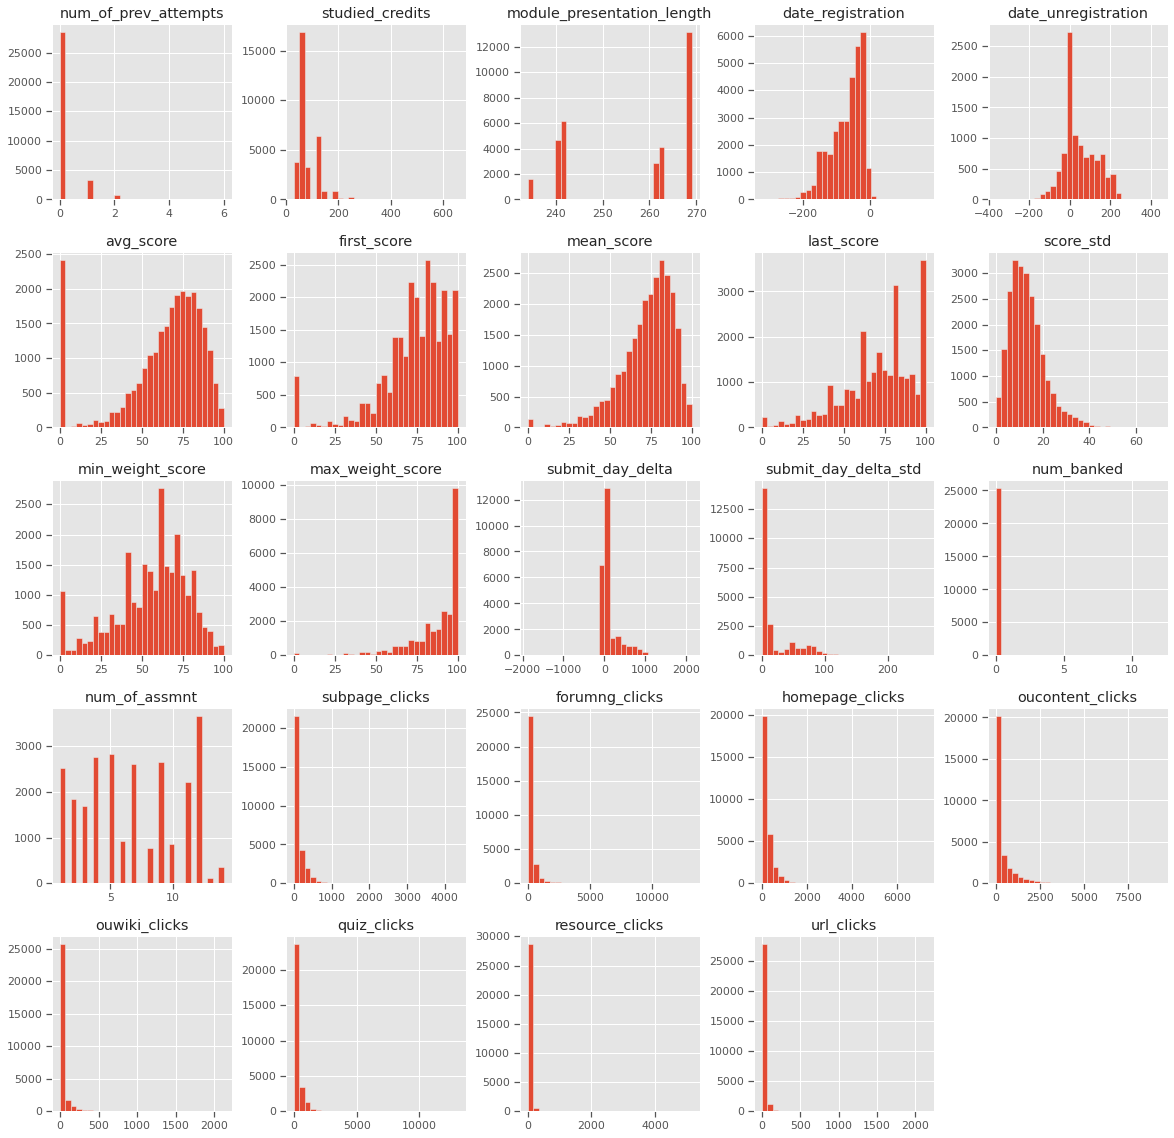

In [12]:
_ = attempts[continious_features].hist(bins=30, figsize=(20, 20))

Some features look highly skewed. To have more understanging of them I'll plot their logarithmic distribution 

In [13]:
# Features to take log of
log_features = ['submit_day_delta', 'submit_day_delta_std', 'subpage_clicks', 
                'forumng_clicks', 'homepage_clicks','oucontent_clicks', 
                'ouwiki_clicks', 'quiz_clicks', 'resource_clicks', 'url_clicks']

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


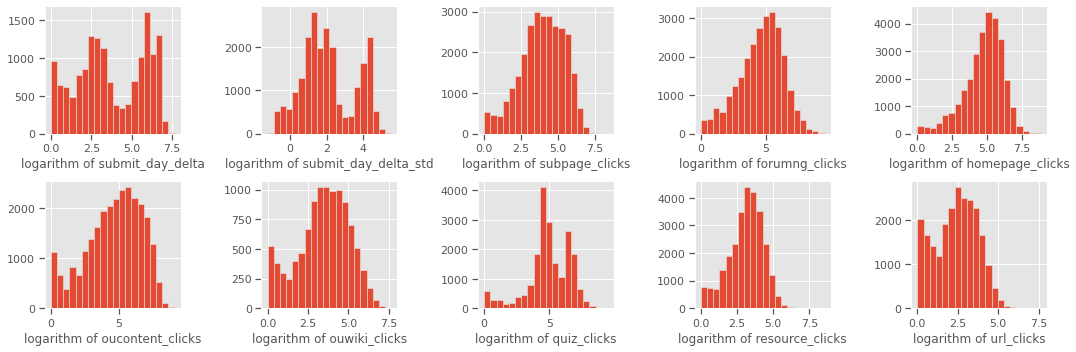

In [14]:
# Set subplot settings 
fig, ax = plt.subplots(2,5,figsize=(15,5))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(2,5), log_features):
  not_null_zero_values = attempts[~(attempts[col].isna()) & (attempts[col] != 0)][col] # Removing NaN and 0 values to not to take errors on the log process
  log = np.log(not_null_zero_values)
  ax[j[0],j[1]].hist(log[np.isfinite(log)], bins=20)
  ax[j[0],j[1]].set_xlabel(f'logarithm of {col}')

plt.tight_layout()

Obviously normalizing made the data more interperetable.

## Categorical feature's distributions

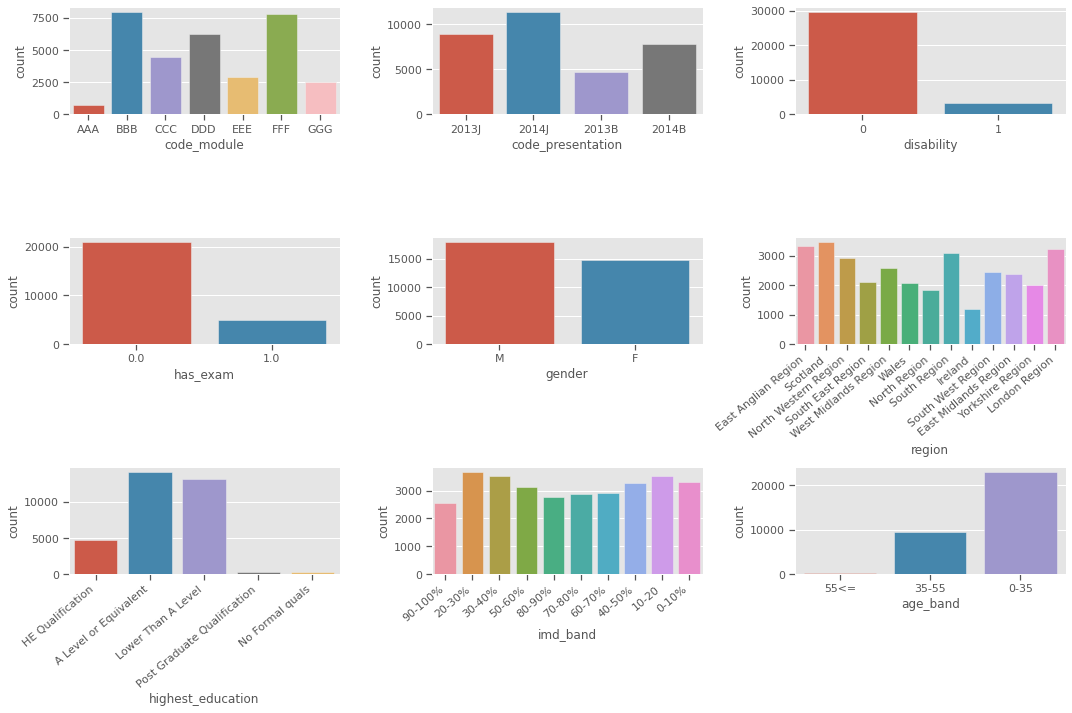

In [15]:
# Set subplot settings 
fig, ax = plt.subplots(3,3, figsize=(15,10))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(3,3), categorical_features):
  _ = sns.countplot(x=col, data=attempts, ax=ax[j[0],j[1]])
  if col in ['region','highest_education', 'imd_band']:
    ax[j[0],j[1]].set_xticklabels(ax[j[0],j[1]].get_xticklabels(), rotation=40, ha="right") 

plt.tight_layout()

For the categorical features there is no obvious distribution. But I wonder how `region`, `highest_education` and `imd_band` effect the target result.

## Data Relationships

How does features affect each other?

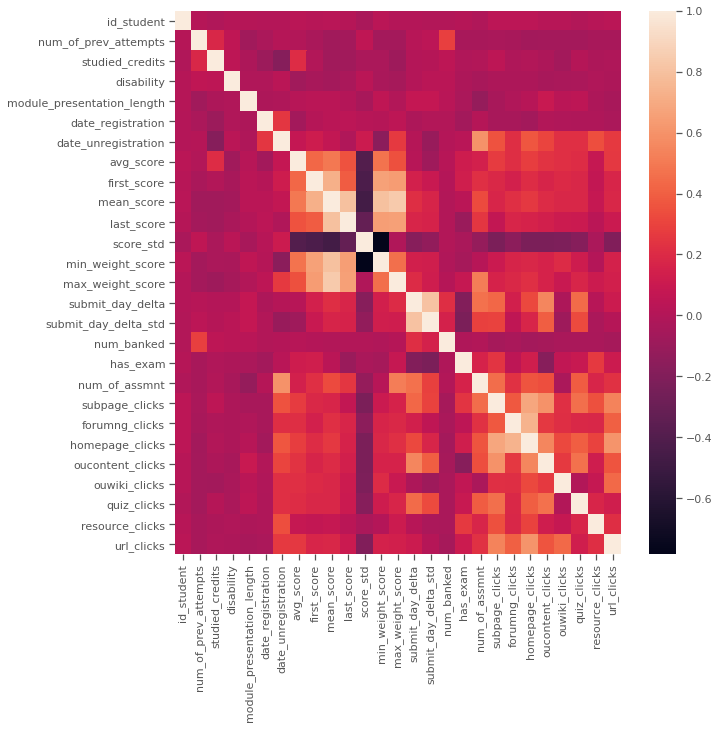

In [16]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(attempts.corr())

### Score features' relation with `final_result`

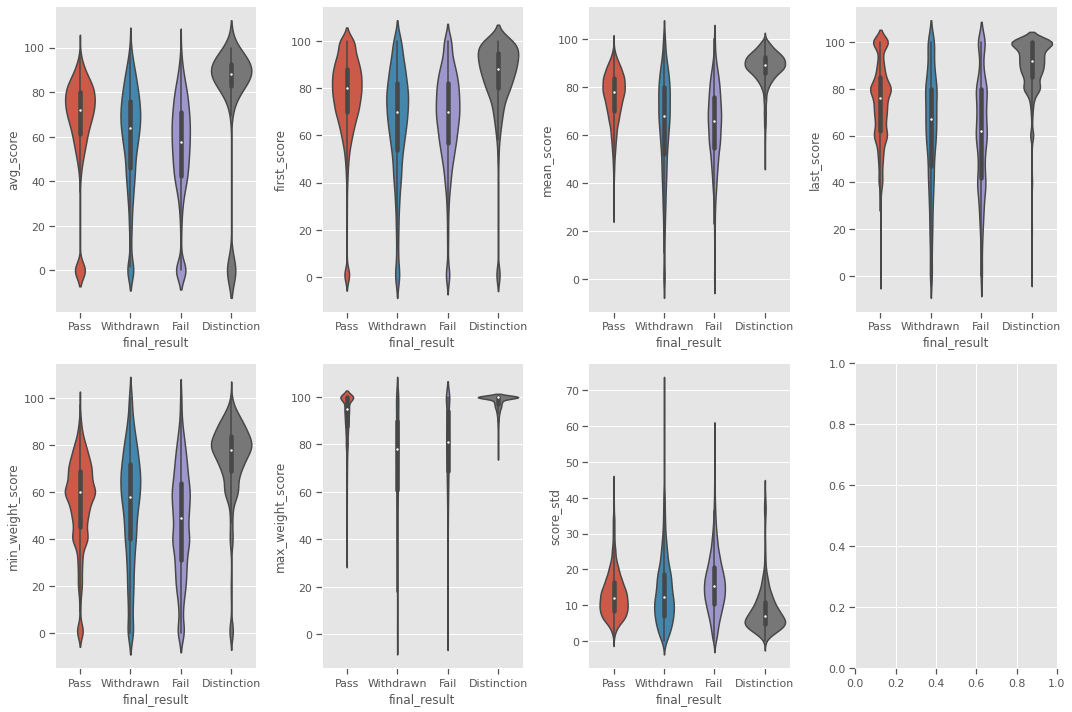

In [17]:
# Set subplot settings 
fig, ax = plt.subplots(2,4, figsize=(15,10))

score_columns = ['avg_score', 'first_score','mean_score', 'last_score', 
                 'min_weight_score', 'max_weight_score', 'score_std']

# Draw each plot with related data and place
for j, col in zip(create_ax_index(2,4), score_columns):
  _ = sns.violinplot(x='final_result', y=col, data=attempts, ax=ax[j[0],j[1]])

plt.tight_layout()

#### Average Score

Before moving further, there are some students with `avg_score` around 0 and having a distinction. This doesn't make sense. I'll have deeper look

In [18]:
_below_20_with_distinction = attempts.query("avg_score < 20 & final_result == 'Distinction'").copy()
_below_20_with_distinction.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
30059,GGG,2013J,24391,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,0,Distinction,261,-64.0,NaN,0.0,80.0,88.888889,100.0,10.540926,80.0,100.0,357.0,46.583259,0.0,0.0,9.0,23.0,62.0,130.0,357.0,0.0,120.0,18.0,0.0
30063,GGG,2013J,60405,F,Yorkshire Region,A Level or Equivalent,10-20,35-55,0,30,0,Distinction,261,-123.0,NaN,0.0,78.0,88.666667,100.0,15.524175,60.0,100.0,359.0,46.902677,0.0,0.0,9.0,15.0,127.0,176.0,360.0,0.0,143.0,27.0,0.0
30068,GGG,2013J,82341,F,South East Region,Lower Than A Level,90-100%,0-35,0,30,1,Distinction,261,-73.0,NaN,0.0,60.0,78.571429,100.0,16.761634,60.0,100.0,248.0,50.842427,0.0,0.0,7.0,32.0,52.0,95.0,244.0,0.0,63.0,22.0,0.0
30076,GGG,2013J,129212,F,South Region,Lower Than A Level,80-90%,0-35,0,30,0,Distinction,261,-109.0,NaN,0.0,65.0,82.375000,60.0,16.061823,60.0,100.0,238.0,42.182427,0.0,0.0,8.0,63.0,272.0,298.0,657.0,0.0,93.0,41.0,0.0
30080,GGG,2013J,155256,M,South East Region,A Level or Equivalent,30-40%,0-35,0,30,0,Distinction,261,-24.0,NaN,0.0,70.0,92.222222,100.0,12.275767,70.0,100.0,384.0,49.426713,0.0,0.0,9.0,3.0,42.0,67.0,200.0,0.0,83.0,10.0,0.0


There are 396 entries. Can they all be at the same class?

In [19]:
_below_20_with_distinction['code_module'].unique(), _below_20_with_distinction['code_presentation'].unique()

(array(['GGG'], dtype=object),
 array(['2013J', '2014B', '2014J'], dtype=object))

So, after having a look at the raw data all of the assignment's weights were 0 for the module GGG. Therefore, for the module GGG `avg_score` and `mean_score` will be the same. So, how replacement will change the distributon and relation with `final_result`? 

In [20]:
_attempts_with_ggg_equlized = attempts.copy()
mask = _attempts_with_ggg_equlized['code_module'].str.contains('GGG')
_attempts_with_ggg_equlized.loc[mask, 'avg_score'] = _attempts_with_ggg_equlized.loc[mask, 'mean_score']

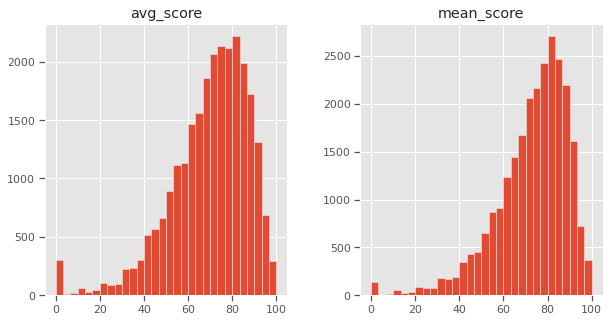

In [21]:
_ = _attempts_with_ggg_equlized[['avg_score', 'mean_score']].hist(bins=30, figsize=(10, 5))

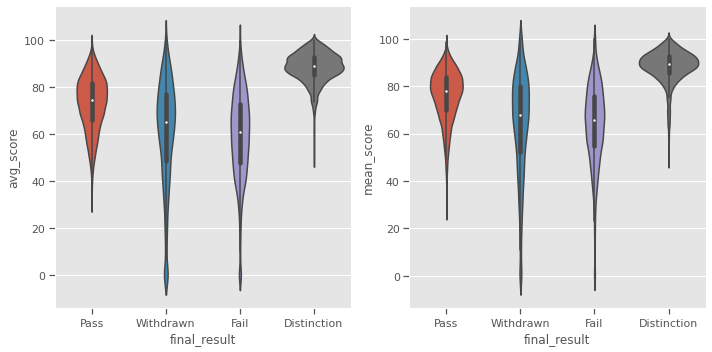

In [22]:
# Set subplot settings 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

_ = sns.violinplot(x='final_result', y='avg_score', data=_attempts_with_ggg_equlized, ax=ax1)
_ = sns.violinplot(x='final_result', y='mean_score', data=_attempts_with_ggg_equlized, ax=ax2)

plt.tight_layout()

With that being corrected the distributions and relations with the `final_result` is pretty much same. Therefore, `avg_score` feature brings no other information than `mean_score`


#### Mean Score

Intuatively, mean score would be the main determiner for the final result. That's why I will deeply examine the mean score's relation with the final result.

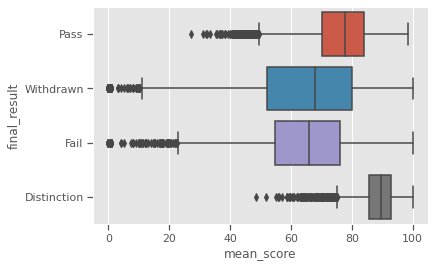

In [23]:
_ = sns.boxplot(x='mean_score', y='final_result', data=attempts)

Withdrawn has more spread than fail. Also, both fail and withdrawn overlaps with pass. How could having same mean_scores will lead to one attempt to pass and the other one to fail? Can those students be in the different modules? Are there any attempts having similar (rounded to 5pts) mean score but different final results in the same class?

In [24]:
def class_grouper(df):
  """"Groups data by code_module, code_presentation and mean_score then creates 
  a lis in final result for each unique result in the group. Returns grouped df"""

  # create a interm dataframe
  group = df[['code_module', 'code_presentation', 'mean_score', 'final_result']].copy()
  group['mean_score'] = round(group['mean_score'] / 5) * 5 

  return group.groupby(['code_module', 'code_presentation', 'mean_score']).agg({'final_result': 'unique'})

class_group = class_grouper(attempts)
class_group.head()

final_result
code_module code_presentation mean_score                         
AAA         2013J             25.0                         [Fail]
                              30.0                    [Withdrawn]
                              35.0              [Withdrawn, Fail]
                              40.0              [Fail, Withdrawn]
                              45.0        [Withdrawn, Pass, Fail]

I'll count the occurence of the situation happening. But without counting both mean scores ending with withdrawn and Fail

In [25]:
def occurence(x):
  n = 0
  if len(x) > 1 and sorted(x) != ['Fail', 'Withdrawn']:
    n +=1
  return n

class_group['final_result'].apply(occurence).sum()

252

Such situation occured 252 times.

\begin{equation}
\frac{252} {32593} = 0,0077
\end{equation}

What is the probability of facing seeing this proportion or bigger?


$H_0: p = 0.0077$      
$H_1: p \neq 0.0077$


In [26]:
def bs_sample(data):
  # Generate bootstrap sample: bs_sample
  df = data.copy()
  randlist = pd.DataFrame(index=np.random.randint(len(df), size=len(df)))
  sample = df.merge(randlist, left_index=True, right_index=True, how='right')
  return sample

def draw_bs_reps(data, size=1):
  """Draw bootstrap replicates.
  resource: Datacamp, Statistical Thinking in Python Part 2"""

  # Initialize array of replicates: bs_replicates
  bs_replicates = np.empty(size)

  # Generate replicates
  for i in range(size):
    sample = bs_sample(data)
    sample_group = class_grouper(sample)
    bs_replicates[i] = sample_group['final_result'].apply(occurence).sum() / len(data)

  return bs_replicates

In [27]:
bs_replicates = draw_bs_reps(attempts, 1000)

In [28]:
sample_mean = np.mean(bs_replicates)
sample_std = np.std(bs_replicates, ddof=1)

z_critical = stats.norm.ppf(q=0.975)
p_value = np.subtract(1, stats.norm.cdf((np.mean(sample_mean) - 0.0077)/sample_std))

moe_z = z_critical * sample_std / np.sqrt(1000)

confidence_interval_t = (sample_mean - moe_z), (sample_mean + moe_z)

print(f"Confidence interval: {confidence_interval_t}")
print(f'P value: {p_value}')

Confidence interval: (0.007364234139423158, 0.007374758895891172)
P value: 0.9999504164022918


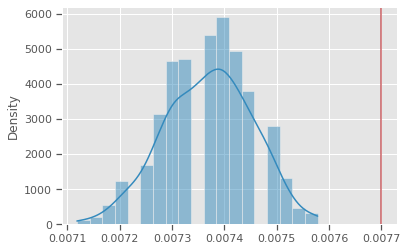

In [29]:
_ = sns.histplot(bs_replicates, kde=True, stat='density')
_ = plt.axvline(0.0077, c='r', alpha=0.9)

Eventough confidence interval excludes 0.0077 it is very close to the the value, and the result might not be practically significant. And very high P value provides that there is not a strong evidence against the null hypothesis.   
To conclude, I will accept the null hypothesis being ture. There may be some attempts with same scores in the same class while ending up with different final results.

#### First Score

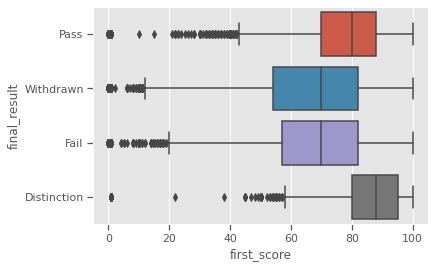

In [30]:
_ = sns.boxplot(x='first_score', y='final_result', data=attempts)

What is the distributon of first score groupped by ten

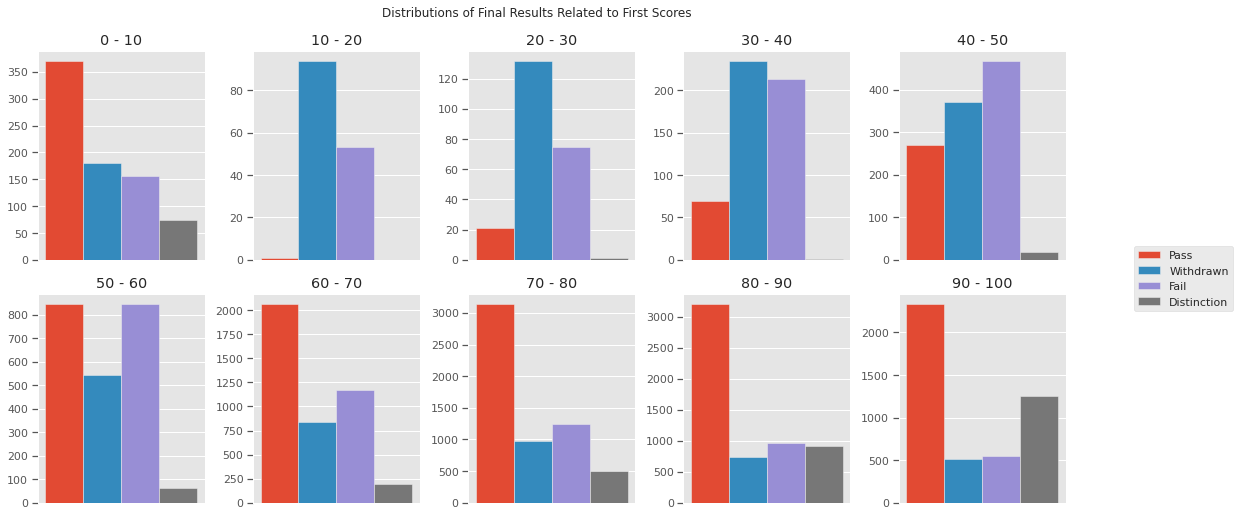

In [31]:
fig, ax = plt.subplots(2,5, figsize=(15,7.5))
spec = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x = np.arange(1)  # the label locations
width = [x - 0.75, x - 0.25, x + 0.25, x + 0.75]  # the width of the bars

for j, idx in zip(create_ax_index(2,5), range(1,len(spec))):

  # Loop in the final_result options to plot in a groupped bar
  for i, result_name in enumerate(attempts['final_result'].unique()):

    # Frame the df to `result_name`
    result_df = attempts.query("final_result == @result_name")

    # Get the count of scores inside the spec for the result
    result_count = (result_df.loc[(result_df['first_score'] > spec[idx-1]) & 
                                (result_df['first_score']<= spec[idx]),
                                'first_score']
                            .count())
    
    # Plot the group for the spec
    ax[j[0], j[1]].bar(width[i], result_count, 0.5, label=result_name)
    ax[j[0], j[1]].set_title(f'{spec[idx-1]} - {spec[idx]}')
    ax[j[0], j[1]].set_xticks([spec[idx]])
    ax[j[0], j[1]].set_xticklabels([spec[idx]])

fig.suptitle("Distributions of Final Results Related to First Scores")
fig.legend(['Pass', 'Withdrawn', 'Fail', 'Distinction'], bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0.)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

As expected, `final_result` distribution changes for different `first_score`. But there is one anomaly here. For the distinction results, there are more attempts being first score bewtween 0-10 than there are 10-40.

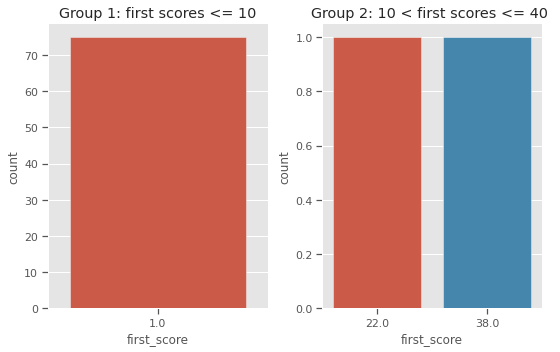

In [32]:
# Set filters distinction, first scores below 10 and between 10 to 40
distinction = attempts['final_result'] == 'Distinction'
below_10 = attempts['first_score'] <= 10
between_10_40 = (attempts['first_score'] > 10) & (attempts['first_score'] <= 40)

# Create two different groups
group1 = attempts[distinction & below_10]
group2 = attempts[distinction & between_10_40]

# Plot the groups to understand their distribution
fig, (ax1, ax2 )= plt.subplots(1,2, figsize=(8,5))
_ = sns.countplot(x=group1['first_score'], ax=ax1)
_ = sns.countplot(x=group2['first_score'], ax=ax2)
ax1.set_title("Group 1: first scores <= 10")
ax2.set_title("Group 2: 10 < first scores <= 40 ")
plt.tight_layout()

For the group two there are two attepmts. They can be outliers or nothing extraordinary. But all of the attempts in Group 1 has 1 as first score. Can they be belong to a class?  

In [33]:
for col in group1:
  uniques = group1[col].nunique()
  if uniques == 1:
    print(col)

code_module
code_presentation
final_result
module_presentation_length
first_score
min_weight_score
num_banked
has_exam
num_of_assmnt
ouwiki_clicks


They obviously belong to one code module and code presentation. They also could be banked from previous presentation

In [34]:
group1.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
6392,BBB,2014J,89850,F,South Region,HE Qualification,90-100%,0-35,0,120,0,Distinction,262,-8.0,NaN,80.90,1.0,66.4,74.0,37.004054,1.0,90.0,7.0,1.140175,0.0,0.0,5.0,64.0,290.0,305.0,284.0,0.0,148.0,110.0,1.0
6423,BBB,2014J,150398,F,East Midlands Region,A Level or Equivalent,90-100%,0-35,0,60,1,Distinction,262,-77.0,NaN,88.45,1.0,70.0,91.0,38.716921,1.0,91.0,45.0,3.741657,0.0,0.0,5.0,25.0,227.0,376.0,1311.0,0.0,126.0,42.0,1.0


They are not banked. And they belong to code module BBB, code presentation 2014J
  
Are there any other students with distinction but without 1 as first score? If there is what are their first scores?

In [35]:
# All attempts with distinction in code module BBB code presentation 2014J
dist_all = attempts[(attempts['code_module'] == 'BBB') & (attempts['code_presentation'] == '2014J') & distinction]
set_1 = set(dist_all.index)

# Attempts with distinction in the same comde module and presentation but with only 1  as first score
dist_w_1 = attempts[distinction & (attempts['first_score'] == 1)]
set_2 = set(dist_w_1.index)

print("Numer of attempts with distinction: {}".format(dist_all.shape[0]))
print("Number of attempts with distinction and with first soce as 1: {}".format(dist_w_1.shape[0]))
print("First scores of other attempts with distinction: {}".format(dist_all.loc[set_1 - set_2]['first_score'].unique()))

Numer of attempts with distinction: 180
Number of attempts with distinction and with first soce as 1: 75
First scores of other attempts with distinction: [100.  90.]


Are there any students having 1 as their first score but without distinction?

In [36]:
attempts[
         (attempts['code_module'] == 'BBB') & 
         (attempts['code_presentation'] == '2014J') & 
         (attempts['first_score'] == 1)
         ].shape

(717, 35)

There is 717 of them.  
This doesn't seem like an anomly but some attempts who catch up later.

#### Last Score


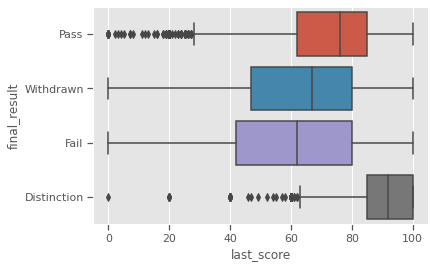

In [37]:
_ = sns.boxplot(x='last_score', y='final_result', data=attempts)

#### Minimum Weighted Assignment's Score 

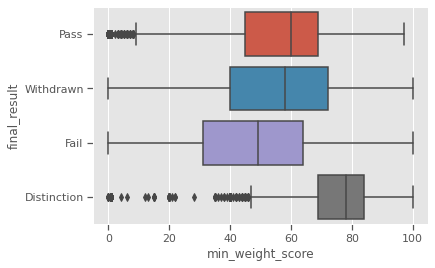

In [38]:
_ = sns.boxplot(x='min_weight_score', y='final_result', data=attempts)

#### Maximum Weighted Assignment's Score

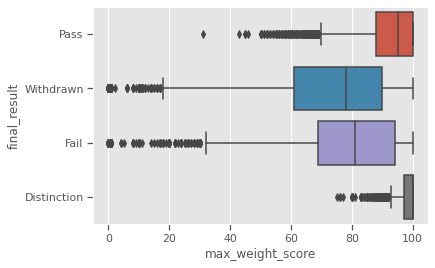

In [39]:
_ = sns.boxplot(x='max_weight_score', y='final_result', data=attempts)

#### Score Standard Deviation

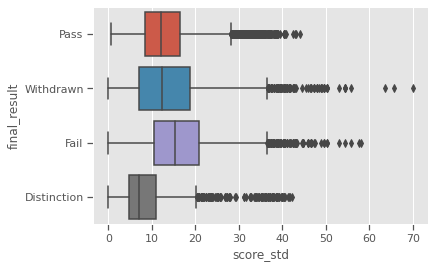

In [40]:
_ = sns.boxplot(x='score_std', y='final_result', data=attempts)

### VLE and submission features' relation with final score

VLE features had very skewed distributions. But their logarithmic distributions were more normally distributed. To make the results more interpreteble I'll check the relations of these distributions with the final result.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


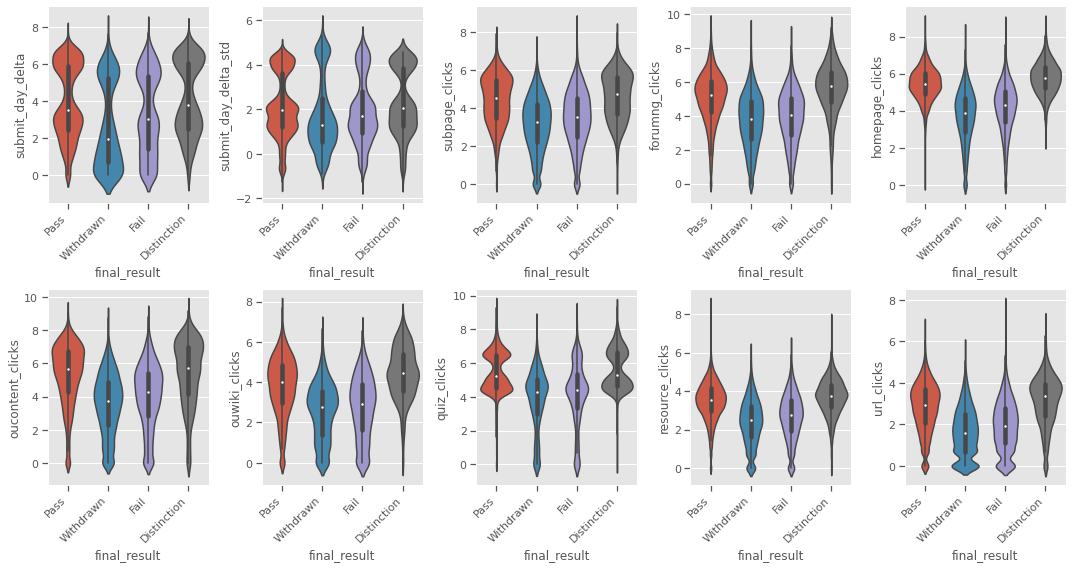

In [41]:
# Set subplot settings 
fig, ax = plt.subplots(2,5,figsize=(15,8))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(2,5), log_features): 
  not_null_zero_values = attempts[~(attempts[col].isna()) & (attempts[col] != 0)][col] # Removing NaN and 0 values to not to take errors on the log process
  log = np.log(not_null_zero_values)
  _ = sns.violinplot(x='final_result', y=log, data=attempts, ax=ax[j[0],j[1]])
  _ = ax[j[0],j[1]].set_xticklabels(ax[j[0],j[1]].get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()

They obviously carry some information.

### Other Continious Feature's Relation With Final Result

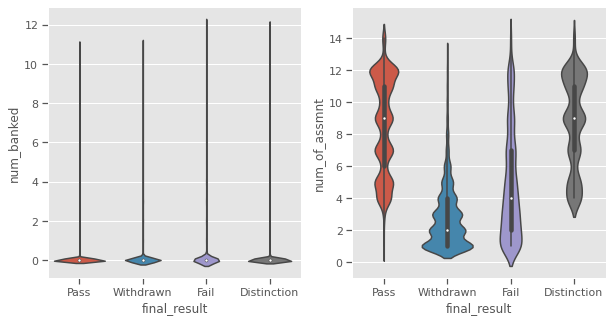

In [42]:
# Set subplot settings 
fig, ax = plt.subplots(1,2, figsize=(10,5))

other_cont_columns = ['num_banked', 'num_of_assmnt']

# Draw each plot with related data and place
for j, col in zip(create_ax_index(1,2), other_cont_columns):
  _ = sns.violinplot(x='final_result', y=col, data=attempts, ax=ax[j[1]])

Number of banked assginments does not provide much information. So it will not be useful.

### Categorical Features' Relation with `final_result`

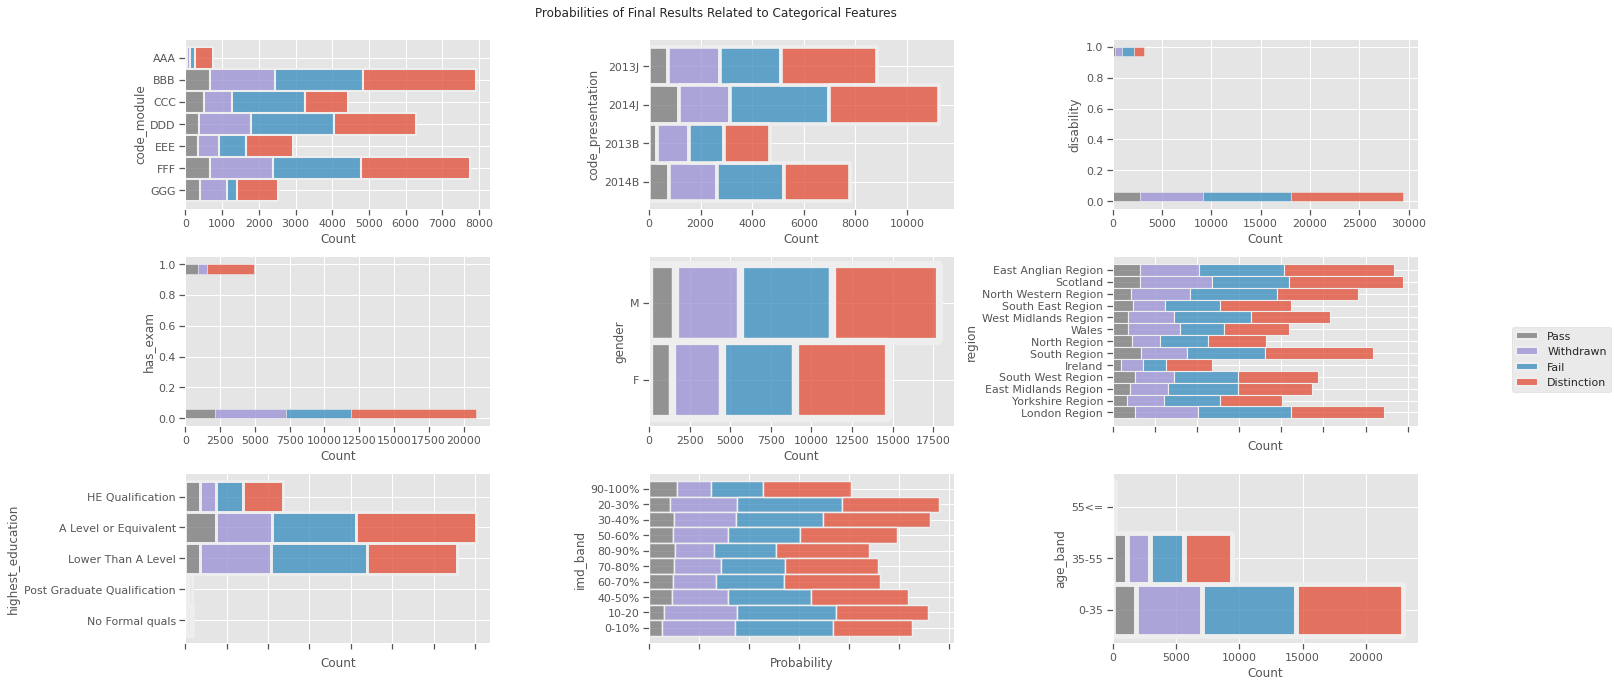

In [57]:
# Set subplot settings 
fig, ax = plt.subplots(3,3, figsize=(20, 10))
plt.rc('legend', loc="best")

# Draw each plot with related data and place
for j, col in zip(create_ax_index(3,3), categorical_features):
  if col == 'imd_band':
      #     When sns.histplot feed with data containing NaN values, which `imd_band` has,
      #     matplotlib raises a conversion error. 
      #     This issue seems like to be solved in https://github.com/matplotlib/matplotlib/issues/14356
      #     But I was having the error so using attempts[~attempts['imd_band'].isna()]
      #     only solution I could come up with

    _ = sns.histplot(y=col, data=attempts[~attempts['imd_band'].isna()], 
                     hue='final_result', multiple='stack', stat='probability',
                     ax=ax[j[0],j[1]], legend=False)
  else:
    _ = sns.histplot(y=col, data=attempts, hue='final_result', 
                     multiple='stack', stat='count', ax=ax[j[0],j[1]],
                     legend=False)
    
  if col in ['region','highest_education', 'imd_band']:
    ax[j[0],j[1]].set_xticklabels(ax[j[0],j[1]].get_xticklabels(), rotation=40, ha="right") 


fig.suptitle("Probabilities of Final Results Related to Categorical Features")
fig.legend(['Pass', 'Withdrawn', 'Fail', 'Distinction'], bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0.)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Looks like there isn't any specific changes based on the features. But again, I'll have another look on `region`, `highest_education` and `imd_band`

In [45]:
# Calcute the normalized general distribution of final result. To add to the plots 
normalized_general_dist = attempts['final_result'].value_counts() / attempts['final_result'].value_counts().sum()

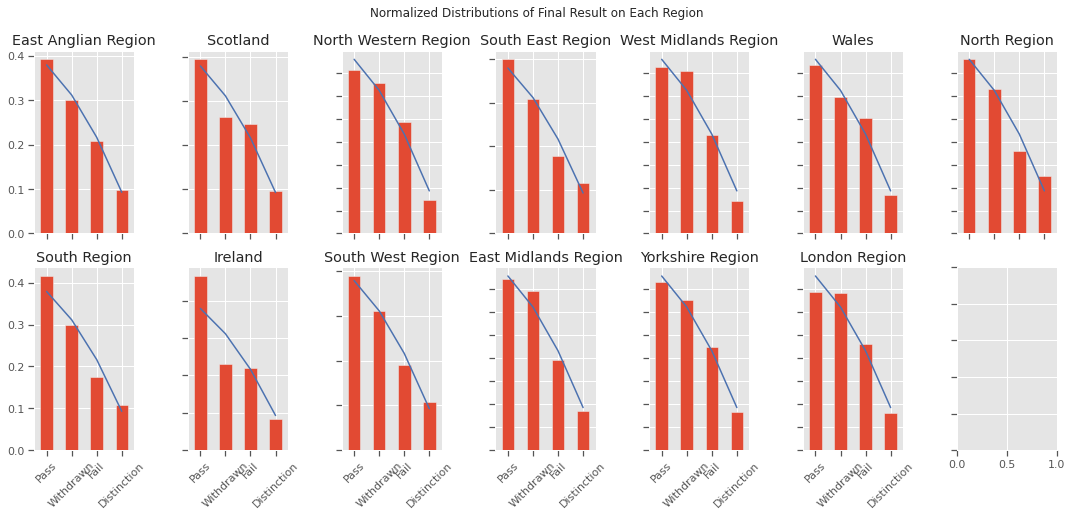

In [46]:
# Plot region-wise distributions of the final result
fig, ax = plt.subplots(2,7, figsize=(15,7.5))

for j, reg in zip(create_ax_index(2,7), attempts['region'].unique()):
  # Normalize each group in itself
  group = (attempts[attempts['region'] == reg]['final_result']
           .value_counts())
  x = group / group.sum()
  # Plot the group
  x.plot(kind='bar', ax=ax[j[0],j[1]], title=reg, sharex=True, sharey=True, rot=45)
  # Add normalized general plot
  normalized_general_dist.plot(kind='line', ax=ax[j[0],j[1]], color='b', rot=45)
  ax[j[0],j[1]].set_xticklabels(attempts['final_result'].unique()) # Somehow if I don't pass this first two xtick is swapped for the first column of plots

fig.suptitle('Normalized Distributions of Final Result on Each Region')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Let's test if location has ny effect on final result.  
$H_0$: The proportions of withdrawn and fail is the same for Ireland
  
To test the null hypothesis I'll make permutation samples 

In [47]:
def draw_perm_reps(df, region, size=1, columns=['region','final_result']):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty((size, 2))
    np.random.seed(42)
    for i in range(size):
        # Generate permutation sample
        perm_sample= pd.DataFrame(data=
                                  {'region': pd.Series(np.random.permutation(
                                                          attempts['region'])), 
                                 'final_result': attempts['final_result']})

        # Compute the test statistic
        values = perm_sample.value_counts()
        perm_replicates[i][0] = values.loc[region, 'Withdrawn']
        perm_replicates[i][1] = values.loc[region, 'Fail']

    return perm_replicates

In [48]:
def p_value_confidence_interval(region, perm_sample):
  """Calculates the p value and confdence interval for agiven region and permutation samples """

  # Observed counts for the final results
  observed_values = (
        attempts[['region', 'final_result']]
        .value_counts()
        .loc[region]
    )

  # Calculate observed proportions for withdrawn and fail
  observed_withdrawn = observed_values.loc['Withdrawn'] / observed_values.sum()
  observed_fail = observed_values.loc['Fail'] / observed_values.sum()

  # Observed absolute difference between them
  observed_difference = observed_withdrawn - observed_fail

  # Calculate proportions for samples
  sample_withdrawn_prop = np.mean(perm_sample[:, 0]) / perm_sample.sum()
  sample_fail_prop = np.mean(perm_sample[:, 1]) / perm_sample.sum()

  # Absoulute difference between withdrawn and fail proportions of sample
  sample_difference = sample_withdrawn_prop - sample_fail_prop

  # P-value for the probability of seeing such difference or smaller 
  p_value = np.sum(sample_difference <= observed_difference) / len(perm_sample)
    
  # Standard error of the difference
  Se = np.sqrt((observed_difference * (1 - observed_difference)) / observed_values.sum() + 
              (sample_difference * (1 - sample_difference)) / len(perm_sample))

  # Confidence interval
  confidence_interval = ((observed_difference - sample_difference - 1.96 * Se), 
                (observed_difference - sample_difference + 1.96 * Se))
  
  return p_value, confidence_interval

In [49]:
 # Create permutaion samples
ireland_samples = draw_perm_reps(attempts, region='Ireland', size=10000)

In [50]:
# Get the p value and confidence interval for the test of null hypothesis
p_value_confidence_interval('Ireland', ireland_samples)

(0.0001, (0.004411218045698124, 0.015823144071388285))

Having a relatively small p value provides that there is no real evidence of in favor of null hypothesis.So it's *statistically significant* that Ireland's withdrawn and fail proportions does not have a connection. Altough the confidence inteval does not contaion 0, it is very close, indicating that the difference is not highly significant.




  
How about Scotland?

In [51]:
  # Create permutaion samples
  scotland_samples = draw_perm_reps(attempts, region='Scotland', size=1000)

In [52]:
p_value_confidence_interval('Scotland', scotland_samples)

(0.001, (0.011511508023941788, 0.020045616553294253))

For Scotland having both small p value and a confidence interval relatively farther to 0 provides that the proportions of withdrawn and fail having a conneciton has no strong evidence.  

And finally London Region.

In [53]:
# Create permutaion samples
london_samples = draw_perm_reps(attempts, region='London Region', size=1000)

In [54]:
p_value_confidence_interval('London Region', london_samples)

(0.001, (0.10261772643538168, 0.12463289898190942))

London has the best results so far.  
  
In conclusion, the region feature had three different regions(Ireland, Scotland and London Region) in it that might carry a piece of information if the feature has an effect on the target value. However, none of these regions had any strong evidence of carrying such proportions is a result of a process. Rather, these process more likely to be a occurred of by random. 

---



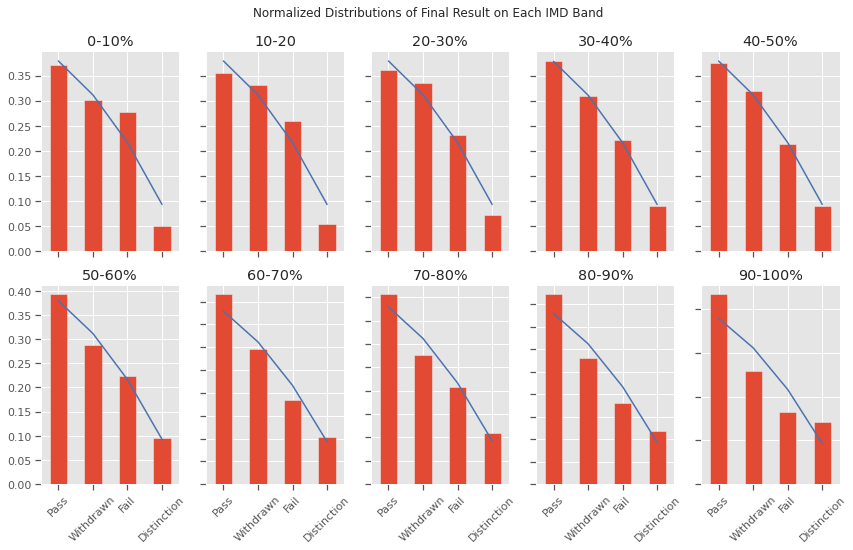

In [55]:
# Plot band-wise distributions of the final result
fig, ax = plt.subplots(2,5, figsize=(12,8))

# Sort the imd_bands to have a more readable plot
sorted_bands = sorted(attempts.loc[~attempts['imd_band'].isna(), 'imd_band'].unique())

for j, imd in zip(create_ax_index(2,5), sorted_bands):
  # Normalize each group in itself
  group = (attempts[attempts['imd_band'] == imd]['final_result']
           .value_counts())
  x = group / group.sum()
  # Plot the group
  x.plot(kind='bar', ax=ax[j[0],j[1]], title=imd, sharex=True, sharey=True, rot=45)
  # Add normalized general plot
  normalized_general_dist.plot(kind='line', ax=ax[j[0],j[1]], color='b', rot=45)
  ax[j[0],j[1]].set_xticklabels(attempts['final_result'].unique()) # Somehow if I don't pass this first two xtick is swapped for the first column of plots

fig.suptitle('Normalized Distributions of Final Result on Each IMD Band')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

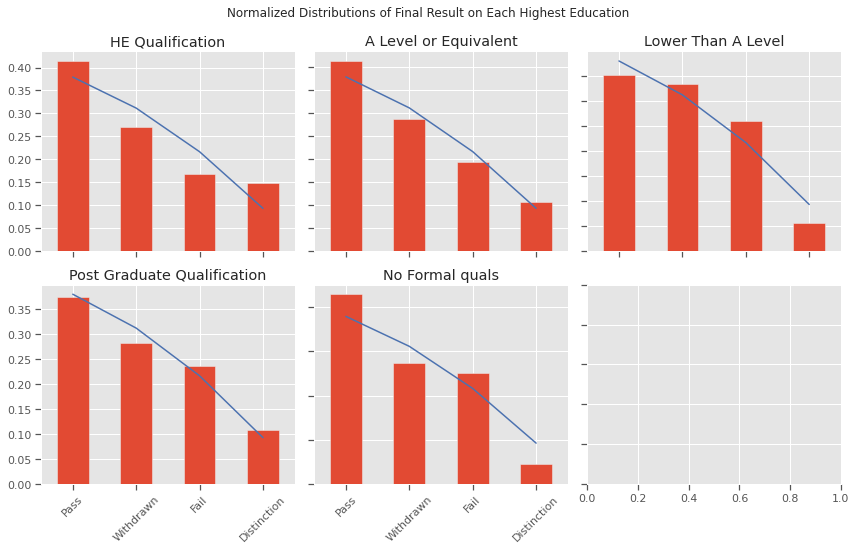

In [56]:
# Plot edicuation-wise distributions of the final result
fig, ax = plt.subplots(2,3, figsize=(12,8))

for j, ed in zip(create_ax_index(2,3), attempts['highest_education'].unique()):
  # Normalize each group in itself
  group = (attempts[attempts['highest_education'] == ed]['final_result']
           .value_counts()) 
  x = group / group.sum()
  # Plot the group
  x.plot(kind='bar', ax=ax[j[0],j[1]], title=ed, sharex=True, sharey=True, rot=45)
  # Add normalized general plot
  normalized_general_dist.plot(kind='line', ax=ax[j[0],j[1]], color='b', rot=45)
  ax[j[0],j[1]].set_xticklabels(attempts['final_result'].unique()) # Somehow if I don't pass this first two xtick is swapped for the first column of plots

fig.suptitle('Normalized Distributions of Final Result on Each Highest Education')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

None of these discrete features has any specific effet on the `final_result`  

# Summary

Firstly, score features had many questions to be cheked. Weithed average score `avg_score` had almost the same distribution with the `mean_score`. For this reason to avoid the redundancy it won't be included in the modelled data. Also, mean score was not the only determiner for the final result. However it might be a strong information provider. Eventough, other score features didn't show any realation with the final result I will not remove them yet. Except, `score_std`. It is highly negatively correlated with other score functions. Which might cause again redundancy
  
Further investigation revealed that location, imd_band and highest education had no strong relation with final result. Also, other features like VLE, submission days didn't had anything specific.

Finally, `attempts_features` is ready for feature engineering.

In [63]:
attempts_features = attempts.drop(columns=['avg_score', 'score_std'], axis=1)

import os

datapath = '../data'
datapath_attempts = os.path.join(datapath, 'attempts_features.csv')
if not os.path.exists(datapath_attempts):
    attempts_features.to_csv(datapath_attempts, index=False)